# Reading Data with xarrays

## Helpful link(s)
- Tutorial on xarrays: http://xarray.pydata.org/en/stable/
- Examples: http://xarray.pydata.org/en/stable/examples.html

### Environment installation
`conda create -n xarrays python=3.6 numpy scipy matplotlib jupyter nb_conda_kernels xarray netcdf4`

Remember to change the kernel to that of the created environment.

As always, we first run `%pylab inline` to embed figures into the notebook. Additionally, we `import` the `h5netcdf` package to let us import the file.

In [2]:
%pylab inline
import xarray

Populating the interactive namespace from numpy and matplotlib


## Inputting the Data
We read the file by calling `xarray.open_dataset`. 

*Note*: If the dataset is in netcdf4 format, the environment will need to have netcdf4 installed. Installing that by running `conda install netcdf4` and restarting the kernel in jupyter should fix that issue.

## Dataset Metadata
xarray makes it easy for us to clearly see the variables as well as the attributes of the dataset. Discussion on metadata can be found here: https://github.com/M6ASP/getting-started/blob/master/Reading%20data%20with%20scipy.io.netcdf.ipynb

In [3]:
dataset = xarray.open_dataset('example_data/WOA13_annual_SST_nc4.nc')
dataset

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Data variables:
    tos      (lat, lon) float64 ...
Attributes:
    Conventions:                   CF-1.6
    title:                         World Ocean Atlas 2013 version 2 : sea_sur...
    summary:                       Climatological mean temperature for the gl...
    references:                    Locarnini, R. A., A. V. Mishonov, J. I. An...
    institution:                   National Oceanographic Data Center(NODC)
    comment:                       global climatology as part of the World Oc...
    id:                            woa13_decav_t00_01.ncv2.0
    naming_authority:              gov.noaa.nodc
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    sea_name:                      World-Wide Distribution
    time_coverage_sta

We can also get individual variable data that shows the contents of the variable as well as its attributes:

In [4]:
dataset['lat']

<xarray.DataArray 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5

We will now assign variables for each of the variables.

In [5]:
lat = dataset['lat']
lon = dataset['lon']
tos = dataset['tos']

We can similarly display the information in the `tos`, sea surface temperature

In [15]:
tos

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [-1.54911, -1.55321, -1.55531, ..., -1.54461, -1.54581, -1.54691],
       [-1.55831, -1.56001, -1.56111, ..., -1.55651, -1.5568 , -1.55741],
       [-1.57421, -1.57421, -1.57421, ..., -1.57421, -1.57421, -1.57421]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Objectively analyzed mean fields for sea_surface_temperat...
    coordinates:    time lat lon depth
    cell_methods:   area: mean depth: mean time: mean
    grid_mapping:   crs
    units:          degrees_celsius

We see that when we plot `tos`, the invalid fill values are already masked for us.

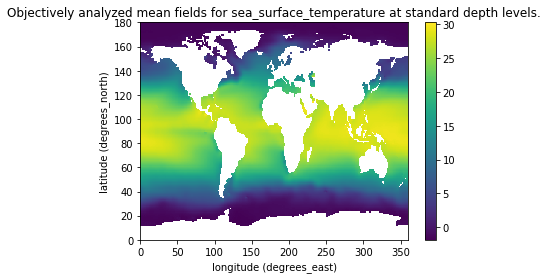

In [16]:
plt.pcolormesh( tos )
plt.colorbar();

plt.title(tos.long_name);
plt.xlabel('%s (%s)' %(lon.long_name, lon.units));
plt.ylabel('%s (%s)' %(lat.long_name, lat.units));

Instead of using `matplotlib`, we can also call the `plot()` function to get the following.

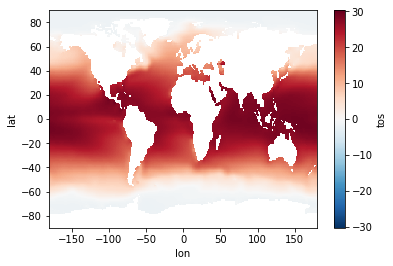

In [18]:
tos.plot()